# **PREDICTING STUDENT'S FLEXIBILITY IN ONLINE LEARNING USING MACHINE LEARNING**

In [ ]:
# Importing necessary libraries for data analysis, visualization, preprocessing, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Uploading the dataset in Google Colab
from google.colab import files
uploaded = files.upload()


Saving students_adaptability_level_online_education.csv to students_adaptability_level_online_education.csv


In [ ]:
# Loading the dataset into a pandas DataFrame
# We read the CSV file into a table-like structure called a DataFrame using pandas.
# This is like loading a spreadsheet into Python.
data = pd.read_csv('/content/students_adaptability_level_online_education.csv')


# Exploratory Data Analysis(EDA)

In [ ]:
# Displaying the first 5 rows to inspect the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
  Education Level Institution Type  Gender  Age  Device IT Student Location  \
0      University          Private    Male   23     Tab         No     Town   
1      University          Private  Female   23  Mobile         No     Town   
2         College           Public  Female   18  Mobile         No     Town   
3          School          Private  Female   11  Mobile         No     Town   
4          School          Private  Female   18  Mobile         No     Town   

  Financial Condition Internet Type Network Type Flexibility Level  
0                 Mid          Wifi           4G          Moderate  
1                 Mid   Mobile Data           4G          Moderate  
2                 Mid          Wifi           4G          Moderate  
3                 Mid   Mobile Data           4G          Moderate  
4                Poor   Mobile Data           3G               Low  


In [ ]:
# Displaying dataset information (data types, non-null counts)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [ ]:
# Checking dataset dimensions (rows, columns)
data.shape

(1205, 11)

In [ ]:
# Checking for missing values in each column
data.isnull().sum()

,0
Education Level,0
Institution Type,0
Gender,0
Age,0
Device,0
IT Student,0
Location,0
Financial Condition,0
Internet Type,0
Network Type,0


In [ ]:
# Displaying summary statistics for numerical columns
data.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [ ]:
# Displaying summary statistics for categorical columns
data.describe(include=object)

,Education Level,Institution Type,Gender,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,3,2,2,3,2,2,3,2,3,3
top,School,Private,Male,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
freq,530,823,663,1013,901,935,878,695,775,625


**count:** The number of non-null entries in each column.

**unique:** The number of distinct values in each column.

**top:** The most frequently occurring value in each column.

**freq:** The number of times the top value appears in each column.

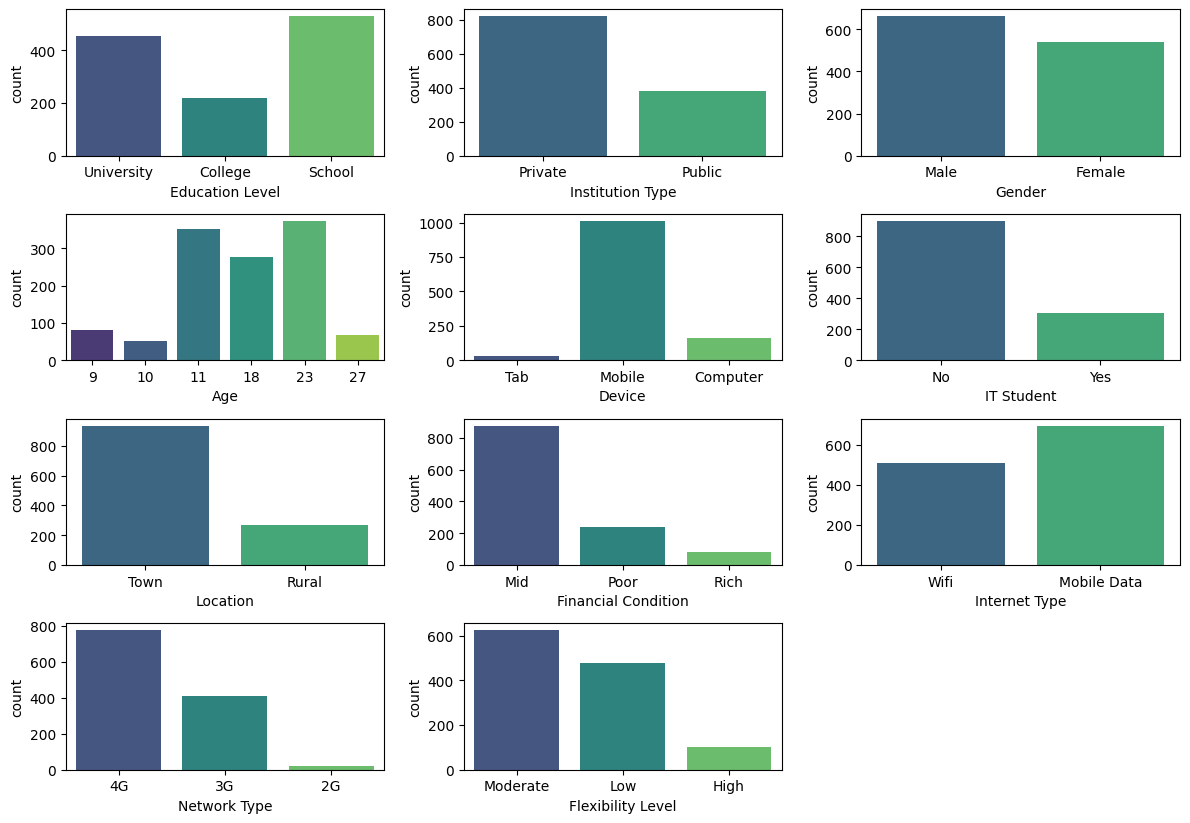

In [ ]:
# Visualizing distributions of all features using count plots
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages for cleaner output
i = 1
plt.figure(figsize = (12,12))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data, palette='viridis')
    i +=1
plt.tight_layout()
plt.show()

Exploring relationships between features and target: 'Flexibility Level'

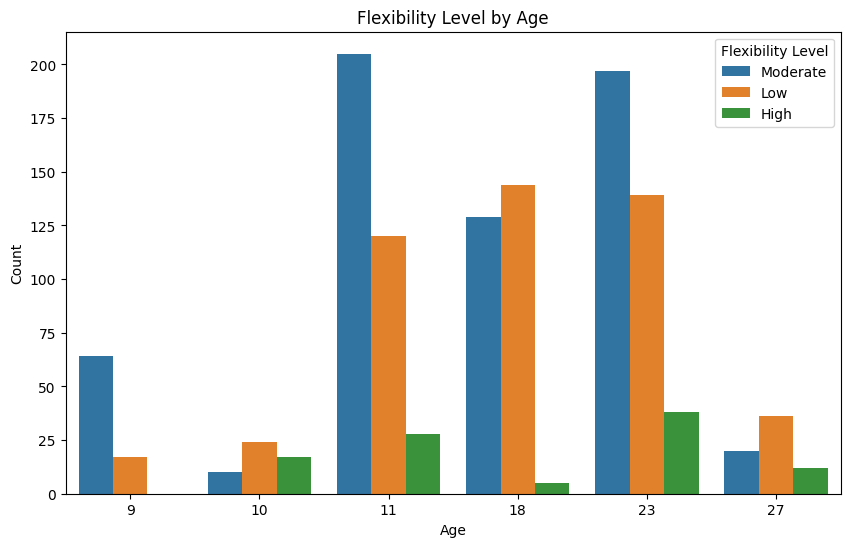

In [ ]:
# Count plot of Flexibility Level across different Ages
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



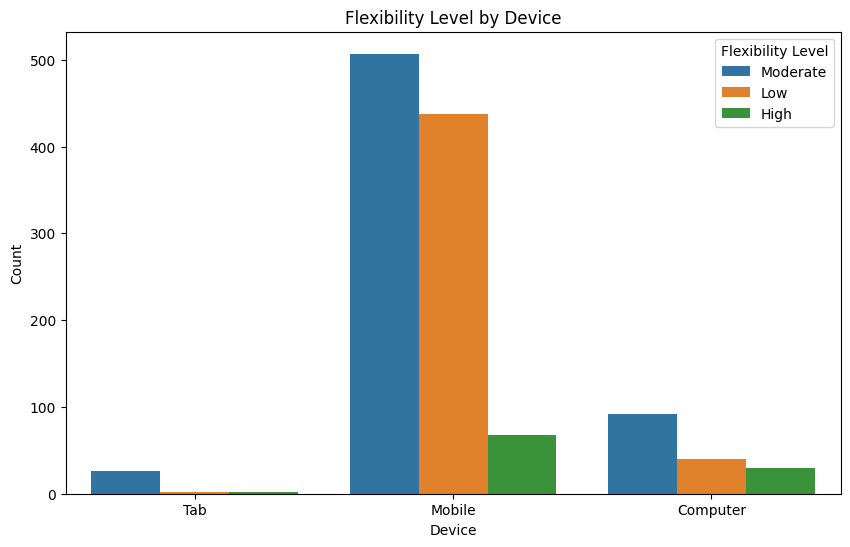

In [ ]:
# Device vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Device', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

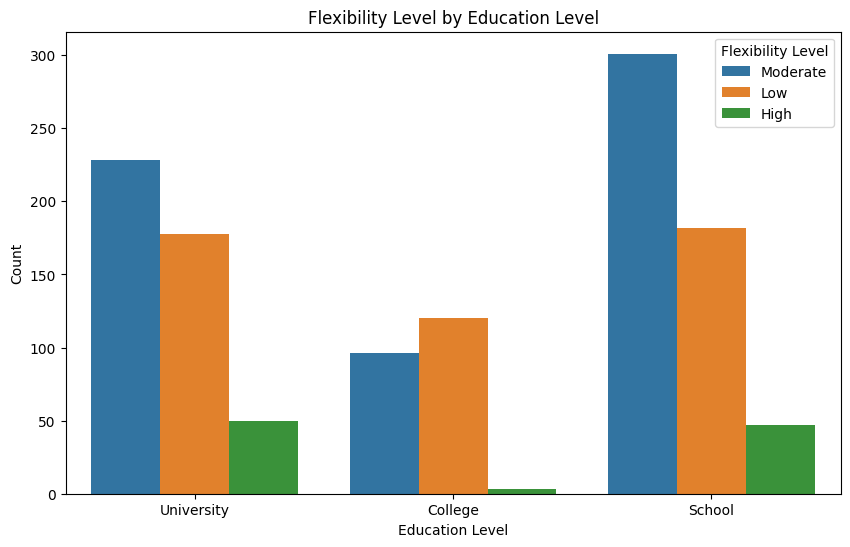

In [ ]:
# Education Level vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# Institution Type vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Institution Type', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Count')
plt.show()

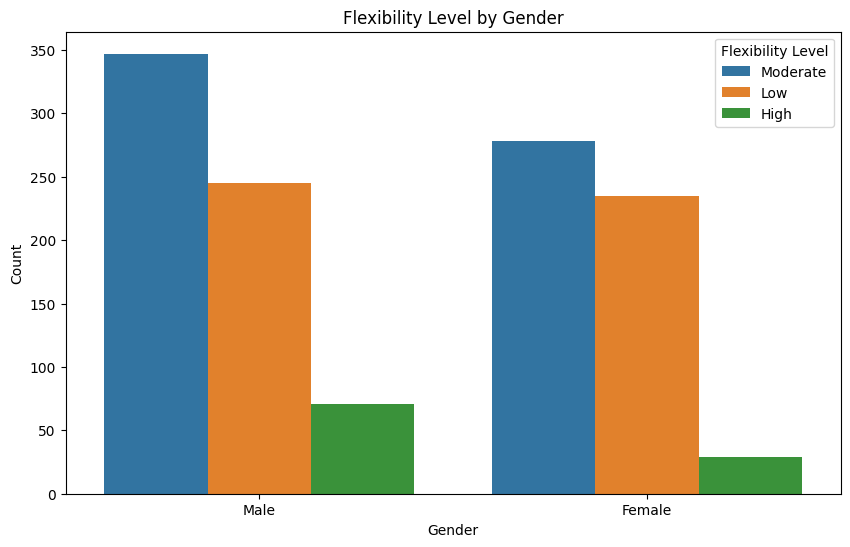

In [ ]:
# Gender vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

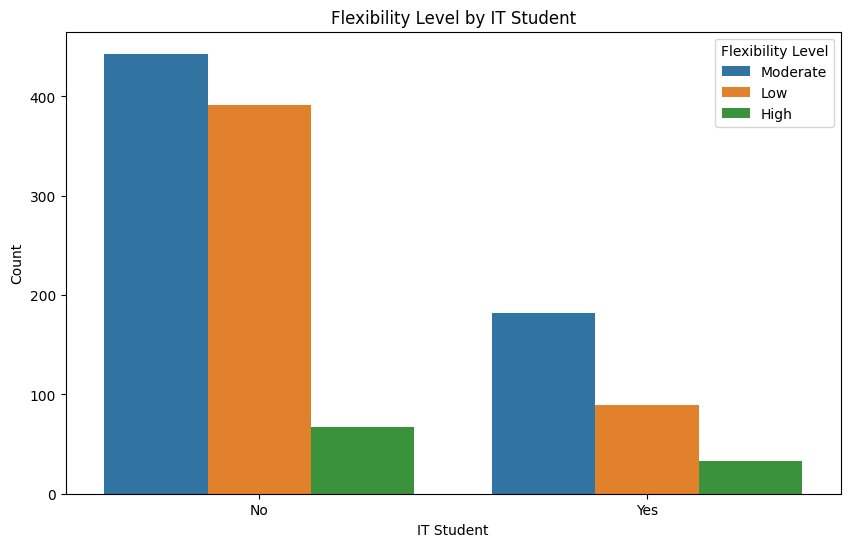

In [ ]:
# IT Student vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='IT Student', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by IT Student')
plt.xlabel('IT Student')
plt.ylabel('Count')
plt.show()

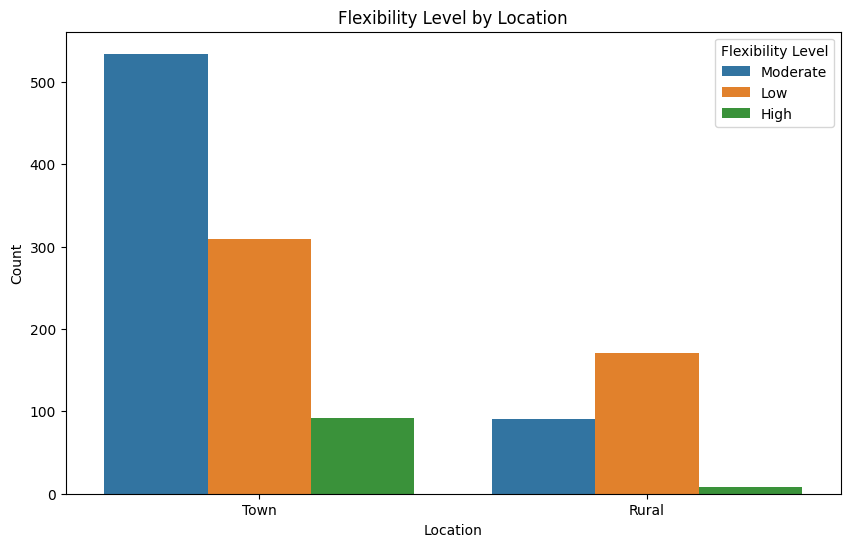

In [ ]:
# Location vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

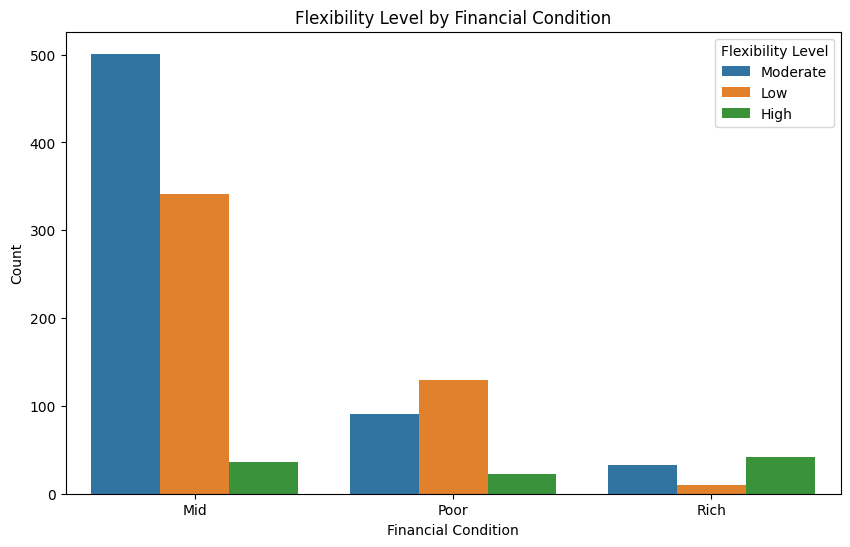

In [ ]:
# Financial Condition vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Financial Condition', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Financial Condition')
plt.xlabel('Financial Condition')
plt.ylabel('Count')
plt.show()

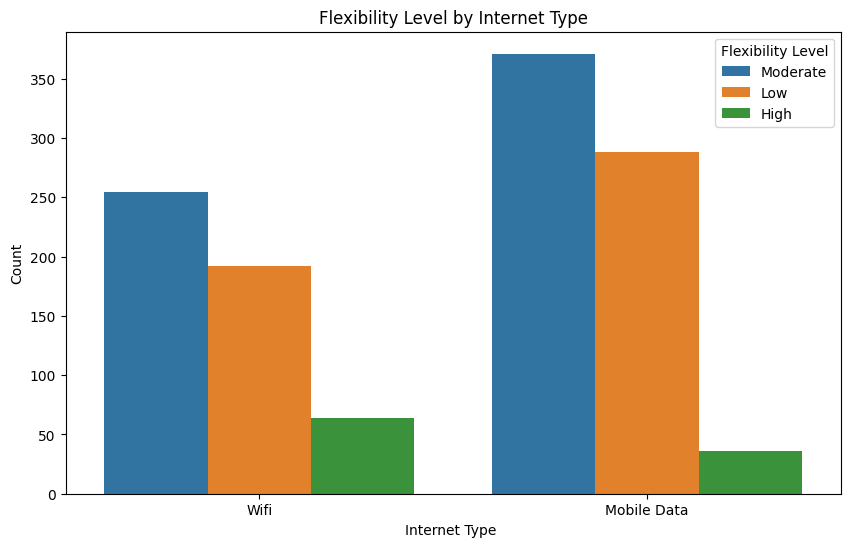

In [ ]:
# Internet type vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Internet Type', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Internet Type')
plt.xlabel('Internet Type ')
plt.ylabel('Count')
plt.show()

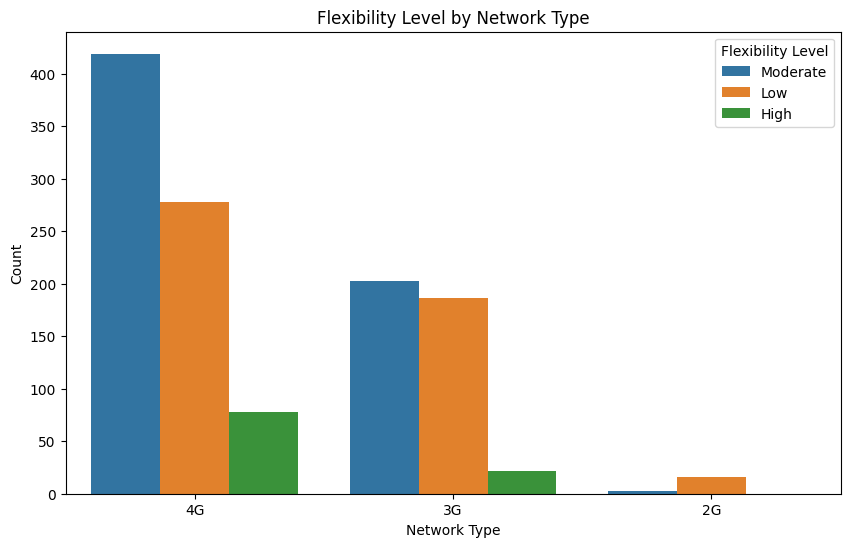

In [ ]:
# Network Type vs Flexibility Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Network Type', hue='Flexibility Level', data=data)
plt.title('Flexibility Level by Network Type')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.show()

Exploring relations between independent variables

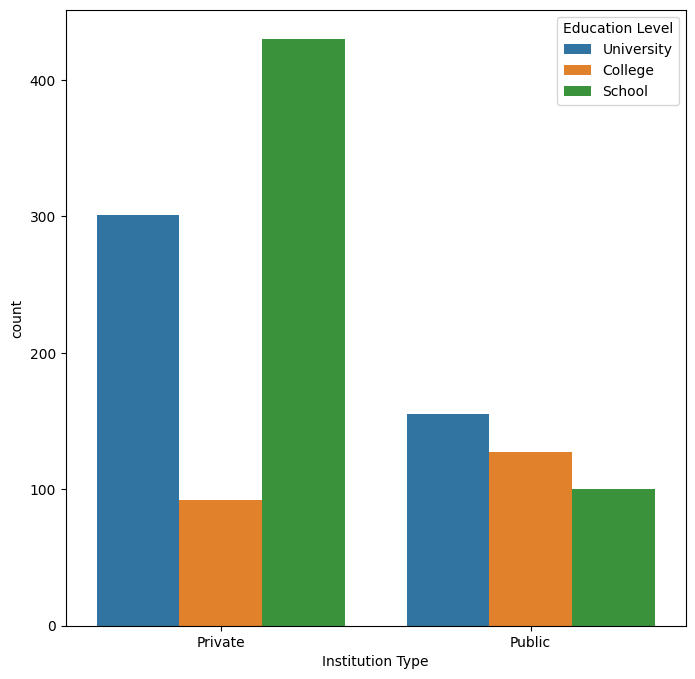

In [ ]:
# Institution Type vs Education Level
plt.figure(figsize=(8,8))
sns.countplot(x="Institution Type", hue="Education Level", data=data)
plt.show()

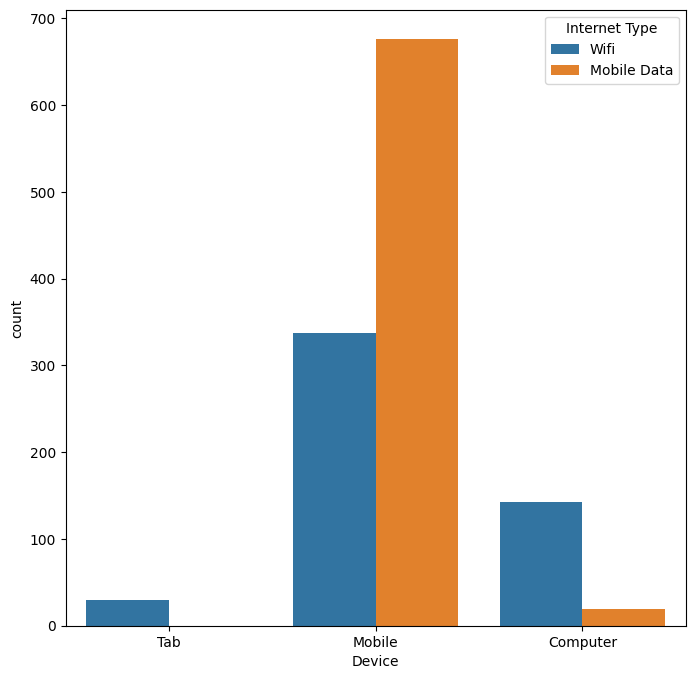

In [ ]:
# Device vs Internet Type
plt.figure(figsize=(8,8))
sns.countplot(x="Device", hue="Internet Type", data=data)
plt.show()

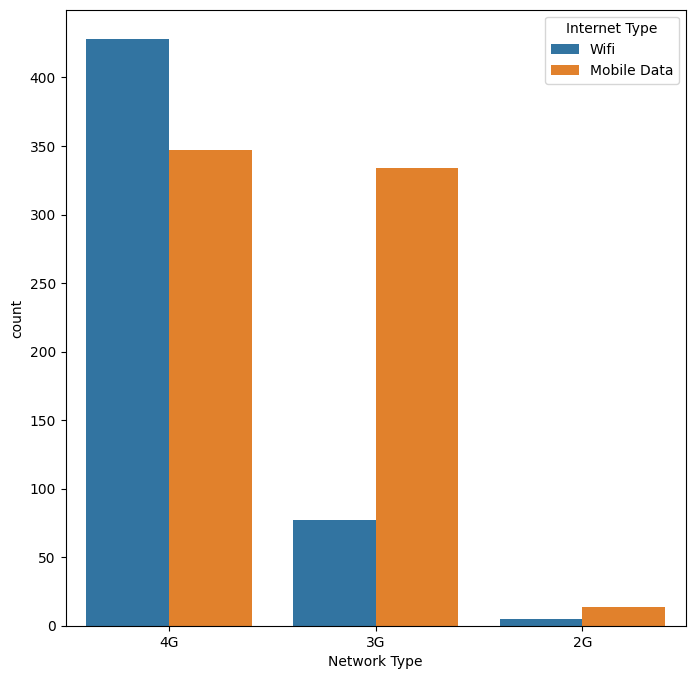

In [ ]:
# Network Type vs Internet Type
plt.figure(figsize=(8,8))
sns.countplot(x="Network Type", hue="Internet Type", data=data)
plt.show()

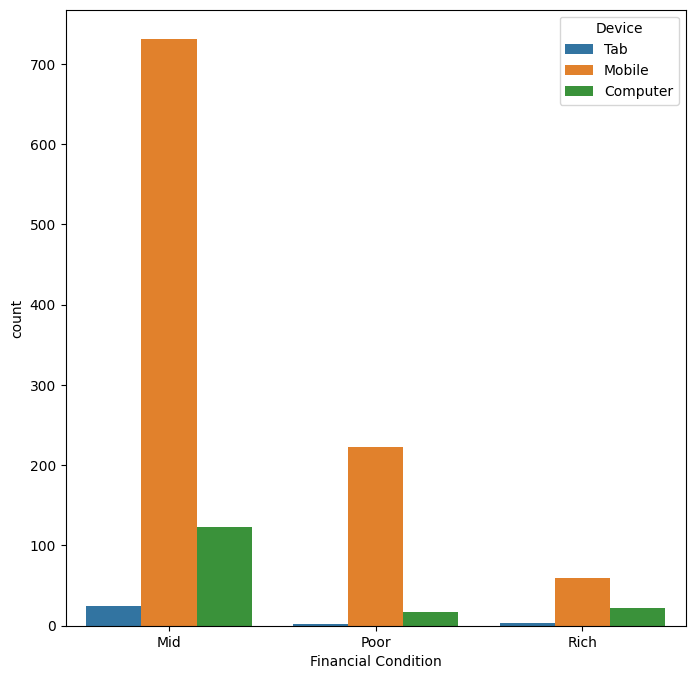

In [ ]:
# Financial Condition vs Device
plt.figure(figsize=(8,8))
sns.countplot(x="Financial Condition", hue="Device", data=data)
plt.show()

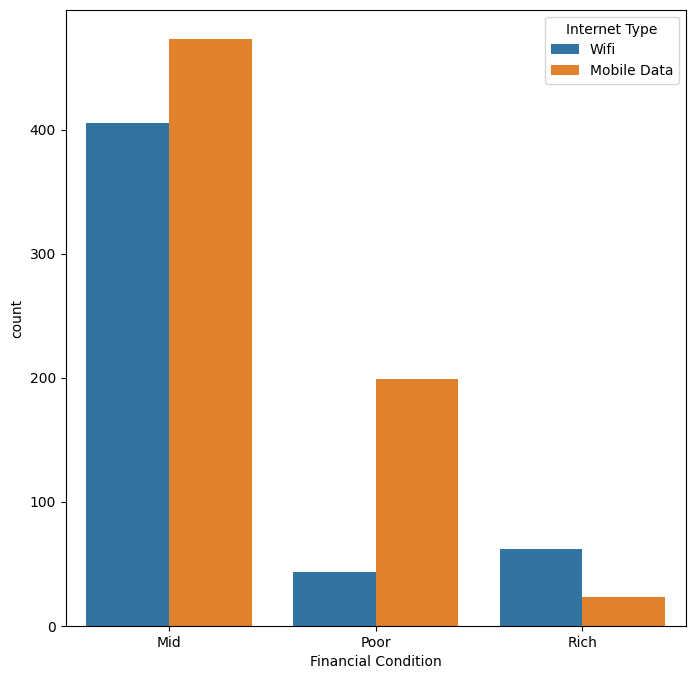

In [ ]:
# Financial Condition vs Internet Type
plt.figure(figsize=(8,8))
sns.countplot(x="Financial Condition", hue="Internet Type", data=data)
plt.show()

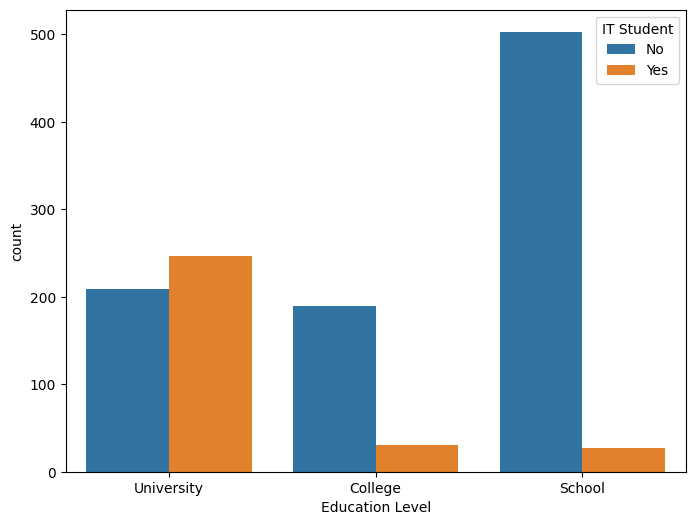

In [ ]:
# Education Level vs IT Student
plt.figure(figsize=(8,6))
sns.countplot(x="Education Level", hue="IT Student", data=data)
plt.show()

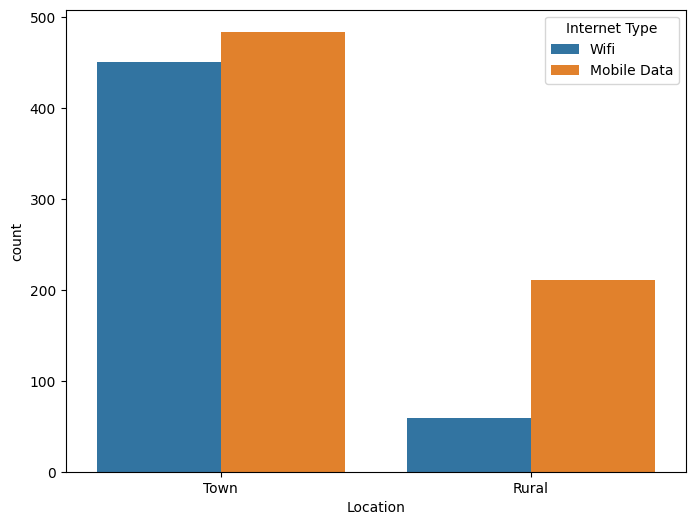

In [ ]:
# Location vs Internet Type
plt.figure(figsize=(8,6))
sns.countplot(x="Location", hue="Internet Type", data=data)
plt.show()

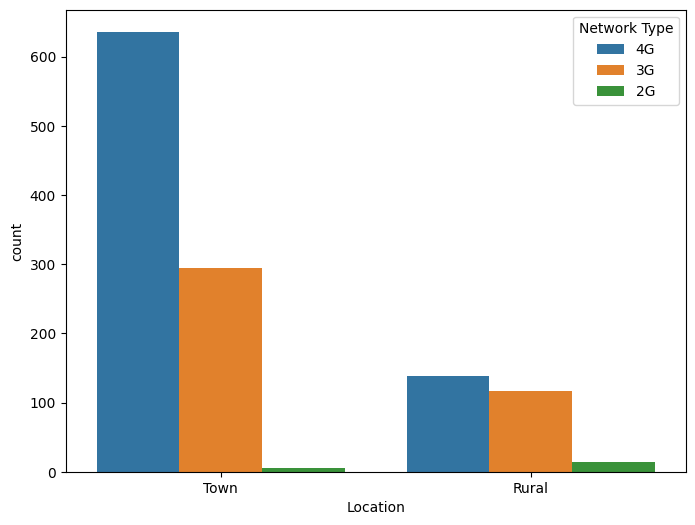

In [ ]:
# Location vs Network Type
plt.figure(figsize=(8,6))
sns.countplot(x="Location", hue="Network Type", data=data)
plt.show()

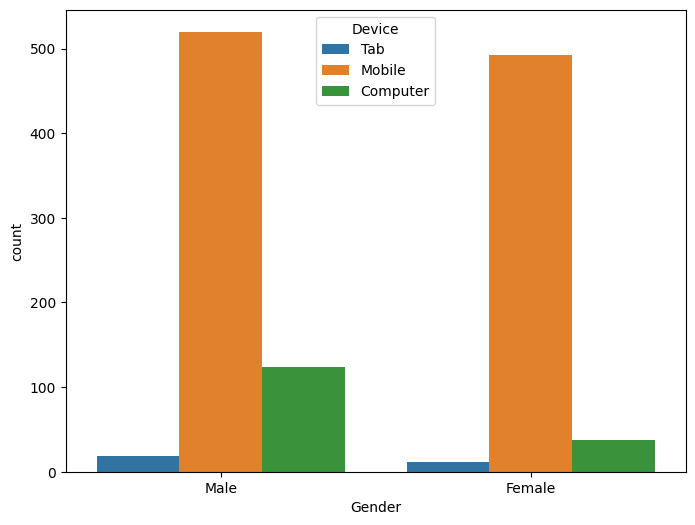

In [ ]:
# Gender vs Device
plt.figure(figsize=(8,6))
sns.countplot(x="Gender", hue="Device", data=data)
plt.show()

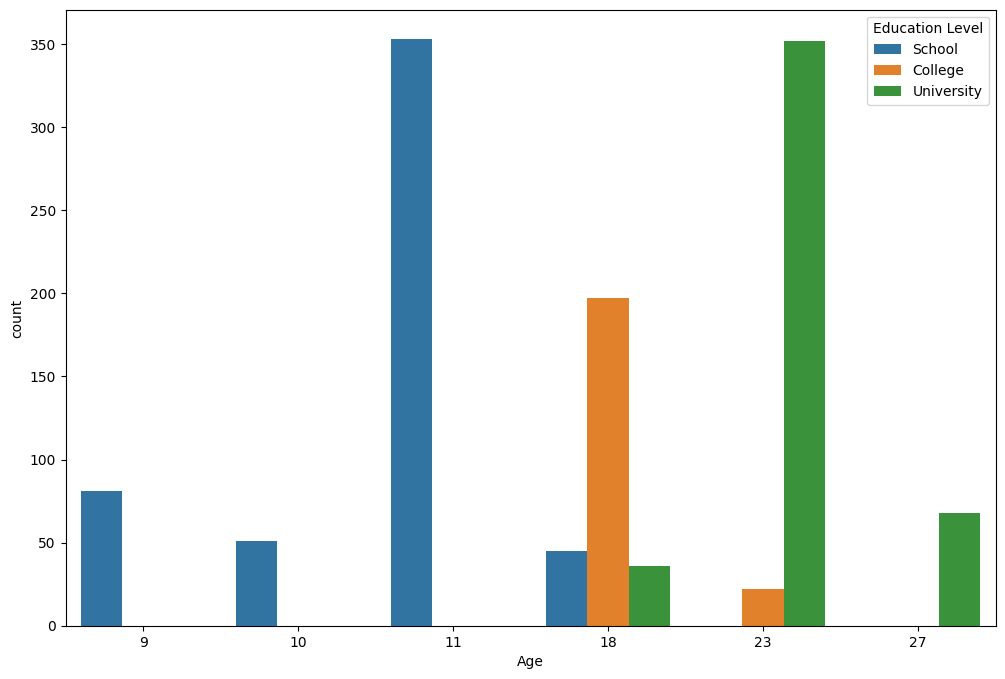

In [ ]:
# Age vs Education Level
plt.figure(figsize=(12,8))
sns.countplot(x="Age", hue="Education Level", data=data)
plt.show()

#Preprocessing
Label Encoding

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include='object').columns

In [ ]:
# Converting text columns to numbers using LabelEncoder
# LabelEncoder turns categories like 'Male' and 'Female' into numbers (e.g., 0 and 1).
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save the encoder

In [ ]:
def print_label_mappings(encoders_dict):
    for column, le in encoders_dict.items():
        print(f"\nLabel encoding for '{column}':")
        for class_, value in zip(le.classes_, le.transform(le.classes_)):
            print(f"  {class_} → {value}")

print_label_mappings(label_encoders)



Label encoding for 'Education Level':
  College → 0
  School → 1
  University → 2

Label encoding for 'Institution Type':
  Private → 0
  Public → 1

Label encoding for 'Gender':
  Female → 0
  Male → 1

Label encoding for 'Device':
  Computer → 0
  Mobile → 1
  Tab → 2

Label encoding for 'IT Student':
  No → 0
  Yes → 1

Label encoding for 'Location':
  Rural → 0
  Town → 1

Label encoding for 'Financial Condition':
  Mid → 0
  Poor → 1
  Rich → 2

Label encoding for 'Internet Type':
  Mobile Data → 0
  Wifi → 1

Label encoding for 'Network Type':
  2G → 0
  3G → 1
  4G → 2

Label encoding for 'Flexibility Level':
  High → 0
  Low → 1
  Moderate → 2


In [ ]:
data

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,2,0,1,23,2,0,1,0,1,2,2
1,2,0,0,23,1,0,1,0,0,2,2
2,0,1,0,18,1,0,1,0,1,2,2
3,1,0,0,11,1,0,1,0,0,2,2
4,1,0,0,18,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,0,0,0,18,1,0,1,0,1,2,1
1201,0,0,0,18,1,0,0,0,1,2,2
1202,1,0,1,11,1,0,1,0,0,1,2
1203,0,0,0,18,1,0,0,0,1,2,1


Correlation Analysis

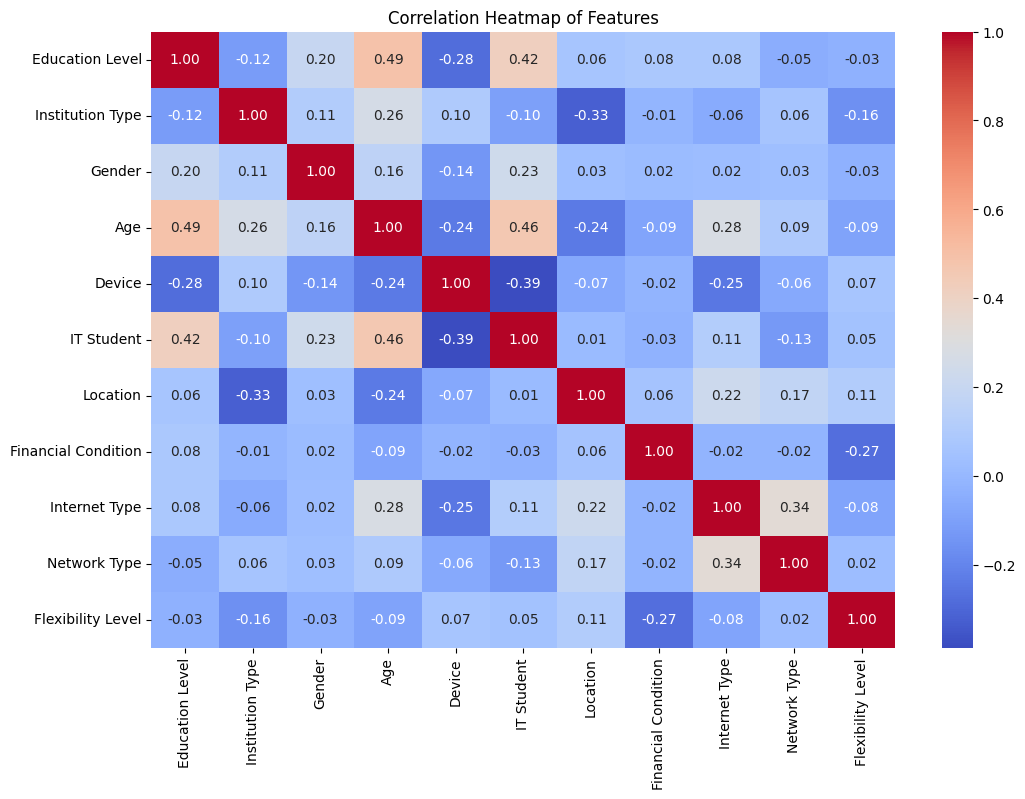

In [ ]:
# Plotting a heatmap to visualize how features are related to each other
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
# Features and Target variable
X = data.drop('Flexibility Level', axis=1)
y = data['Flexibility Level']

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [ ]:
# Defining models and hyperparameter grids
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20]
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}



=== Hyperparameter Tuning and Results for Random Forest ===
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Accuracy Score: 0.8423236514522822
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.84      0.90      0.87       103
           2       0.84      0.84      0.84       115

    accuracy                           0.84       241
   macro avg       0.85      0.77      0.80       241
weighted avg       0.84      0.84      0.84       241



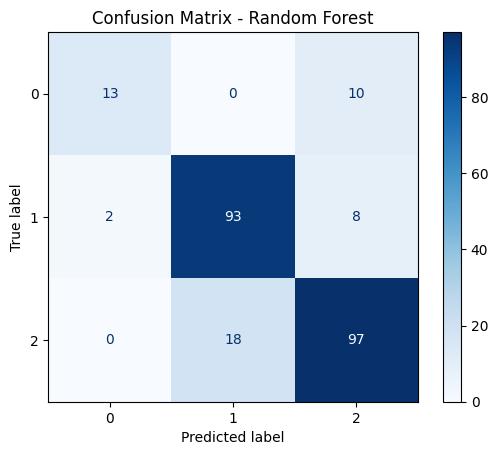

Cross-validated Accuracy (mean ± std): 0.8282 ± 0.0125

=== Hyperparameter Tuning and Results for Decision Tree ===
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Accuracy Score: 0.8464730290456431
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.85      0.90      0.87       103
           2       0.84      0.85      0.85       115

    accuracy                           0.85       241
   macro avg       0.85      0.77      0.80       241
weighted avg       0.85      0.85      0.84       241



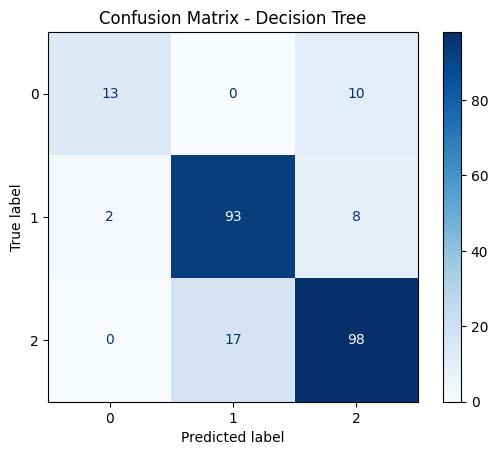

Cross-validated Accuracy (mean ± std): 0.8324 ± 0.0097

=== Hyperparameter Tuning and Results for SVM ===
Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Accuracy Score: 0.8132780082987552
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.57      0.70        23
           1       0.82      0.84      0.83       103
           2       0.79      0.83      0.81       115

    accuracy                           0.81       241
   macro avg       0.85      0.75      0.78       241
weighted avg       0.82      0.81      0.81       241



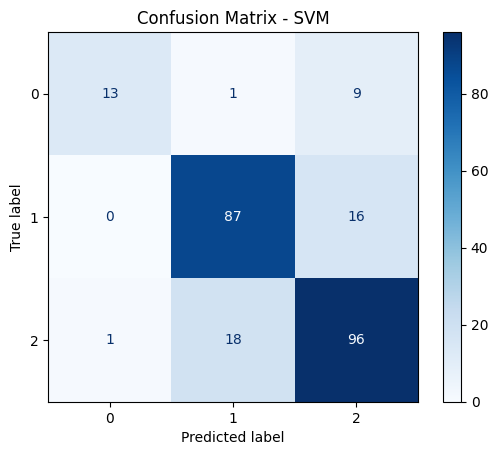

Cross-validated Accuracy (mean ± std): 0.8025 ± 0.0107


In [ ]:
# Model training and evaluation
model_scores = {}
best_models = {}
cv_scores = {} # Initialize cv_scores dictionary

for name, clf in classifiers.items():
    print(f"\n=== Hyperparameter Tuning and Results for {name} ===")

    # Pipeline: add StandardScaler only for SVM
    if name == 'SVM':
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
    else:
        pipe = Pipeline([
            ('classifier', clf)
        ])

    # Grid search for best parameters
    grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    # Best model evaluation
    best_model = grid.best_estimator_
    best_models[name] = best_model

    #predicting on test data
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy # Store the accuracy score in the dictionary

    print("Best Parameters:", grid.best_params_)
    print("Accuracy Score:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))


     # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # 5-fold Cross-Validation on entire data
    scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(f"Cross-validated Accuracy (mean ± std): {scores.mean():.4f} ± {scores.std():.4f}")

#Model Comparision

In [ ]:
# Comparing the test accuracy
print("\n=== Accuracy on Test Set ===")
for model, acc in model_scores.items():
    print(f"{model}: {acc:.4f}")


=== Accuracy on Test Set ===
Random Forest: 0.8423
Decision Tree: 0.8465
SVM: 0.8133


**Cross-validated accuracy** tell us how well the model performs on average across multiple different train-test splits of  data — instead of relying on just one test set.




In [ ]:
# Comparing the cross-validation accuracy
print("\n=== Cross-Validated Accuracy ===")
for model, score in cv_scores.items():
    print(f"{model}: {score:.4f}")


=== Cross-Validated Accuracy ===
Random Forest: 0.8282
Decision Tree: 0.8324
SVM: 0.8025


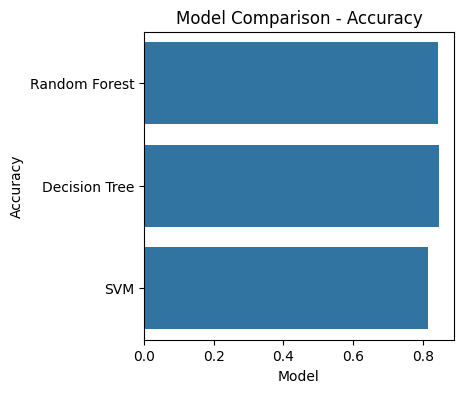

In [ ]:
# Plotting the model accuracy comparison
model_names = list(model_scores.keys())
accuracies = list(model_scores.values())
plt.figure(figsize=(4, 4))
sns.barplot(y=model_names, x=accuracies)
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Identify best model based on cross-val accuracy
best_model_name = max(cv_scores, key=cv_scores.get)
print(f"\n Best Model based on Cross-Val Accuracy: {best_model_name} ({cv_scores[best_model_name]:.4f})")


 Best Model based on Cross-Val Accuracy: Decision Tree (0.8324)


#Feature Important Analysis

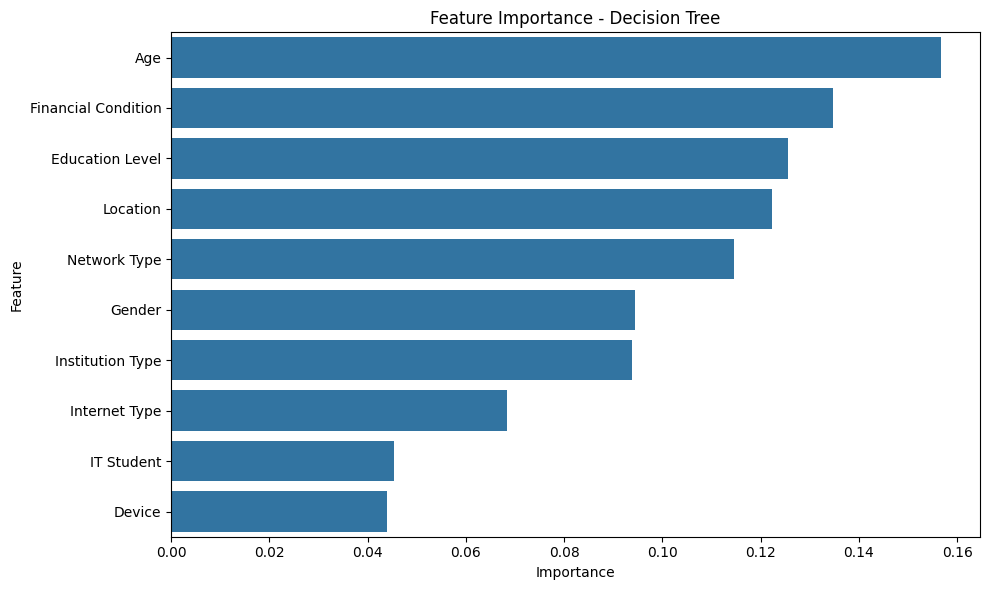

In [ ]:
# Feature Importance for best model (if tree-based)
if best_model_name in ['Random Forest', 'Decision Tree']:
    best_clf = best_models[best_model_name]
    importances = best_clf.named_steps['classifier'].feature_importances_
    feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feat_series, y=feat_series.index)
    plt.title(f"Feature Importance - {best_model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig(f"feature_importance_{best_model_name}.png")
    plt.show()
else:
    print("Feature importance not available for non-tree model like SVM.")


In [ ]:
#Printing top 5 important features
print("\nTop 5 Important Features:")
for feature, importance in feat_series.head(5).items():
    print(f"{feature}: {importance}")



Top 5 Important Features:
Age: 0.15682147135169014
Financial Condition: 0.13464728517707017
Education Level: 0.1255123425099761
Location: 0.1223376217772133
Network Type: 0.11465756362434439


# Deployment Logic

User Input Simulation

In [ ]:
# Define category mappings (based on label encoding used for inputs)
financial_map = {'Mid': 0, 'Poor': 1, 'Rich': 2}
education_map = {'College': 0, 'School': 1, 'University': 2}
location_map = {'Rural': 0, 'Town': 1}
network_map = {'2G': 0, '3G': 1, '4G': 2}
age_map = {'9': 0, '10': 1, '11': 2, '18': 3, '23': 4, '27': 5}

#  Label encode target variable
target_encoder = LabelEncoder()
data['Flexibility Level'] = target_encoder.fit_transform(data['Flexibility Level'])

# Save all encoders including the target encoder
label_encoders['Flexibility Level'] = target_encoder

# Function to get validated input from user
def get_input(prompt, valid_options, mapping):
    while True:
        user_input = input(prompt).strip()
        if user_input in valid_options:
            return mapping[user_input]
        else:
            print(f"❌ Invalid input. Please enter one of: {', '.join(valid_options)}")

# Collect inputs with validation
print("Please enter the following details:")

age = get_input("Age (9, 10, 11, 18, 23, 27): ", age_map.keys(), age_map)
financial_condition = get_input("Financial Condition (Poor / Mid / Rich): ", financial_map.keys(), financial_map)
education_level = get_input("Education Level (University / College / School): ", education_map.keys(), education_map)
location = get_input("Location (Rural / Town): ", location_map.keys(), location_map)
network_type = get_input("Network Type (2G / 3G / 4G): ", network_map.keys(), network_map)

# Create a DataFrame with just the top 5 features
sample_input = pd.DataFrame([{
    'Age': age,
    'Financial Condition': financial_condition,
    'Education Level': education_level,
    'Location': location,
    'Network Type': network_type
}])

# Fill in remaining features with median values from training data (X)
full_input = pd.DataFrame(columns=X.columns)
for col in full_input.columns:
    if col in sample_input.columns:
        full_input[col] = sample_input[col]
    else:
        full_input[col] = [X[col].median()]

# Make prediction using trained model
prediction = best_model.predict(full_input)

# Decode prediction using target label encoder
predicted_label = le.inverse_transform(prediction)


# Print the predicted label
print("\nPredicted Flexibility Level:", predicted_label[0])



Please enter the following details:
Age (9, 10, 11, 18, 23, 27): 27
Financial Condition (Poor / Mid / Rich): Rich
Education Level (University / College / School): University
Location (Rural / Town): Town
Network Type (2G / 3G / 4G): 4G

Predicted Flexibility Level: High


Model Export

In [ ]:
import joblib

# Assuming this is the best model
joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

In [ ]:
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [ ]:
joblib.dump(X, "X_columns.pkl")  # Save feature structure for prediction


['X_columns.pkl']